In [462]:
import pandas as pd
import numpy as np

In [463]:
df = pd.read_csv('datasets/respuestas_filtered.csv')

In [464]:
df.head()

,Sexo,Edad,Fumador,dedos amarillos,Ansiedad,presion de grupo,enfermedad cronica,fatiga,Alergia,Sibilancias,Consumo Alcohol,Tos,Dificultad respirar,Dificultad tragar,Dolor en pecho,Cancer de pulmon
0,1,57,1,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,82,2,2,2,2,1,2,2,2,2,1,1,2,1,2
2,1,44,1,1,2,2,2,2,2,1,1,1,1,2,2,2
3,1,29,1,1,1,2,1,2,2,2,2,2,1,1,1,1
4,1,41,1,1,2,1,2,2,2,1,1,1,2,1,1,2


In [465]:
X = df.drop('Cancer de pulmon', axis=1)
y = df['Cancer de pulmon']

In [334]:
from imblearn.over_sampling import SMOTE

In [335]:
print(y.value_counts())  

Cancer de pulmon
2    5058
1    4918
Name: count, dtype: int64


In [336]:
smote = SMOTE(k_neighbors=1)

In [337]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [338]:
print(pd.Series(y_resampled).value_counts())

Cancer de pulmon
2    5058
1    5058
Name: count, dtype: int64


In [339]:
from imblearn.under_sampling import RandomUnderSampler

In [340]:
rus = RandomUnderSampler(replacement=False)

In [341]:
X_resampled, y_resampled = rus.fit_resample(X, y)

In [342]:
print(pd.Series(y_resampled).value_counts())

Cancer de pulmon
1    4918
2    4918
Name: count, dtype: int64


In [343]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Supongamos que 'X' son tus características y 'y' es tu variable objetivo
# X, y = ...

# Sobremuestreo
over_sampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = over_sampler.fit_resample(X, y)

# Submuestreo
under_sampler = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = under_sampler.fit_resample(X, y)


In [344]:
y_over.value_counts()

Cancer de pulmon
2    5058
1    5058
Name: count, dtype: int64

In [345]:
y_under.value_counts()

Cancer de pulmon
1    4918
2    4918
Name: count, dtype: int64

In [346]:
X_over.value_counts()

Sexo  Edad  Fumador  dedos amarillos  Ansiedad  presion de grupo  enfermedad cronica  fatiga  Alergia  Sibilancias  Consumo Alcohol  Tos  Dificultad respirar  Dificultad tragar  Dolor en pecho
1     43    1        2                1         1                 1                   1       1        1            2                2    1                    1                  2                 3
2     25    2        1                2         1                 2                   2       1        2            2                1    1                    2                  2                 2
      78    2        2                2         2                 1                   1       2        1            1                2    2                    2                  1                 2
1     88    1        1                2         2                 1                   1       1        2            1                1    1                    2                  1                 2
2     46    1  

In [387]:
df_approach_2 = df.copy()
categorical_cols = ['Sexo', 'Fumador', 'Alergia', 'Sibilancias', 'Consumo Alcohol', 'Tos', 'Dificultad respirar', 'Dificultad tragar', 'Dolor en pecho']
df_approach_2 = pd.get_dummies(df_approach_2, columns=categorical_cols)
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Edad', 'Ansiedad', 'presion de grupo', 'enfermedad cronica', 'fatiga']
scaler = StandardScaler()
df_approach_2[numerical_cols] = scaler.fit_transform(df_approach_2[numerical_cols])

In [389]:
X = df_approach.drop('Cancer de pulmon', axis=1)
y = df['Cancer de pulmon']

In [347]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# DecisionTreeClassifier #

In [466]:
from sklearn.tree import DecisionTreeClassifier

In [467]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [499]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=15)

In [500]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=15)

In [501]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [502]:
y_pred = model1.predict(X_test)

In [503]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4978282659538924


# Linear Regression #

In [436]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [438]:
regressor_model = linear_model.LinearRegression()

In [439]:
regressor_model.fit(X,y)

LinearRegression()

In [440]:
y_pred = regressor_model.predict(X_test).astype(int)    
y_pred_train = regressor_model.predict(X_train)

In [441]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

C:\Users\Castl\OneDrive\Escritorio\dev\Exploration-Models-HackaTec-Local-2024-Filtro\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [442]:
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.50
Precision: 0.00
Recall: 0.00
F1-score: 0.00


# Logisct Regression #

In [504]:
from sklearn.linear_model import LogisticRegression

In [505]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [506]:
model3 = LogisticRegression(solver="liblinear")

In [507]:
model3.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [508]:
y_pred = model3.predict(X_test)

In [509]:
y_pred_proba = model3.predict_proba(X_test)[:, 1]

In [510]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("AUC-ROC: {:.2f}".format(auc_roc))

Accuracy: 0.50
Precision: 0.50
Recall: 0.32
F1-score: 0.39
AUC-ROC: 0.49


# Random Forest #

In [450]:
from sklearn.ensemble import RandomForestClassifier

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [452]:
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)

RandomForestClassifier()

In [453]:
y_pred = model4.predict(X_test)

In [454]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5061810892081523


# SVM #

In [455]:
from sklearn import svm

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [457]:
model5 = svm.SVC(kernel='linear') # Linear Kernel

In [458]:
model5.fit(X_train, y_train)


SVC(kernel='linear')

In [459]:
y_pred = model5.predict(X_test)

In [460]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4998329435349148


In [461]:
# Model Precision: what percentage of positive tuples are labeled as such?
print(f'Precision: {metrics.precision_score(y_test, y_pred)}')

# Model Recall: what percentage of positive tuples are labelled as such?
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')


Precision: 0.4998329435349148
Recall: 1.0


In [264]:
test_data = pd.read_csv('datasets/test_data.csv')

In [265]:
test_data.describe()

,dedos amarillos,presion de grupo,Alergia,Dificultad respirar,Dificultad tragar,Edad
count,1000.000000,1000.00000,999.000000,999.000000,999.00000,999.000000
mean,1.505000,1.50000,1.504505,1.508509,1.49049,53.495495
std,0.500225,0.50025,0.500230,0.500178,0.50016,21.098199
min,1.000000,1.00000,1.000000,1.000000,1.00000,18.000000
25%,1.000000,1.00000,1.000000,1.000000,1.00000,34.000000
50%,2.000000,1.50000,2.000000,2.000000,1.00000,53.000000
75%,2.000000,2.00000,2.000000,2.000000,2.00000,72.000000
max,2.000000,2.00000,2.000000,2.000000,2.00000,90.000000


In [266]:
test_data.dtypes

Sexo                    object
Fumador                 object
dedos amarillos          int64
Ansiedad                object
presion de grupo         int64
enfermedad cronica      object
fatiga                  object
Alergia                float64
Sibilancias             object
Consumo Alcohol         object
Tos                     object
Dificultad respirar    float64
Dificultad tragar      float64
Dolor en pecho          object
Edad                   float64
dtype: object

In [267]:
(test_data.isnull().sum()/(len(test_data)))*100

Sexo                   0.0
Fumador                0.0
dedos amarillos        0.0
Ansiedad               0.0
presion de grupo       0.0
enfermedad cronica     0.1
fatiga                 0.0
Alergia                0.1
Sibilancias            0.1
Consumo Alcohol        0.1
Tos                    0.1
Dificultad respirar    0.1
Dificultad tragar      0.1
Dolor en pecho         0.1
Edad                   0.1
dtype: float64

In [268]:
test_data = test_data.dropna()

In [269]:
test_data.isna().sum()

Sexo                   0
Fumador                0
dedos amarillos        0
Ansiedad               0
presion de grupo       0
enfermedad cronica     0
fatiga                 0
Alergia                0
Sibilancias            0
Consumo Alcohol        0
Tos                    0
Dificultad respirar    0
Dificultad tragar      0
Dolor en pecho         0
Edad                   0
dtype: int64

In [270]:
for i in test_data.columns:
    print(f'{i}: {test_data[i].unique()}')

Sexo: ['F' 'M']
Fumador: ['2' '1' 'b' 's']
dedos amarillos: [2 1]
Ansiedad: ['2' '1' 'b']
presion de grupo: [2 1]
enfermedad cronica: ['2' '1' 'x']
fatiga: ['2' '1']
Alergia: [1. 2.]
Sibilancias: ['1' '2' 'd' 'c']
Consumo Alcohol: ['2' '1' 'y' 'f']
Tos: ['1' '2' 'n']
Dificultad respirar: [2. 1.]
Dificultad tragar: [2. 1.]
Dolor en pecho: ['1' '2' 'm' 'h' 'r' 'e']
Edad: [83. 71. 65. 69. 55. 19. 60. 29. 36. 27. 58. 82. 53. 70. 37. 88. 32. 35.
 25. 49. 41. 24. 21. 73. 39. 30. 46. 48. 78. 77. 31. 34. 84. 76. 44. 22.
 23. 26. 43. 66. 61. 56. 20. 45. 42. 50. 63. 54. 72. 51. 38. 28. 40. 87.
 86. 75. 67. 33. 90. 47. 52. 74. 80. 18. 89. 81. 59. 79. 62. 85. 68. 64.
 57.]


In [271]:
for col in test_data.columns:
  if col == 'Sexo':
    outlier = [v for v in test_data['Sexo'] if not v in ['M', 'F']]
    print(f'{col}: {len(outlier)}')
  elif col not in ['Sexo','Edad', 'Cancer de pulmon']:
    outlier = [v for v in test_data [col] if v not in ['1', '2', 1, 2, 1.0, 2.0]]
    print(f'{col}: {len(outlier)}')
  elif col == 'Edad':
    outlier = [v for v in test_data [col] if v in ['V', '/', '&']]
    print(f'{col}: {len(outlier)}')


Sexo: 0
Fumador: 2
dedos amarillos: 0
Ansiedad: 1
presion de grupo: 0
enfermedad cronica: 1
fatiga: 0
Alergia: 0
Sibilancias: 2
Consumo Alcohol: 2
Tos: 1
Dificultad respirar: 0
Dificultad tragar: 0
Dolor en pecho: 4
Edad: 0


In [272]:
test_data_filtered = test_data.copy()
for col in test_data_filtered.columns:
  if col not in ['Sexo','Edad']:
    test_data_filtered = test_data_filtered[test_data_filtered[col].isin(['1', '2', 1, 2, 1.0, 2.0])]


In [273]:
for i in test_data_filtered.columns:
    print(f'{i}: {test_data_filtered[i].unique()}')

Sexo: ['F' 'M']
Fumador: ['2' '1']
dedos amarillos: [2 1]
Ansiedad: ['2' '1']
presion de grupo: [2 1]
enfermedad cronica: ['2' '1']
fatiga: ['2' '1']
Alergia: [1. 2.]
Sibilancias: ['1' '2']
Consumo Alcohol: ['2' '1']
Tos: ['1' '2']
Dificultad respirar: [2. 1.]
Dificultad tragar: [2. 1.]
Dolor en pecho: ['1' '2']
Edad: [83. 71. 65. 69. 55. 19. 60. 29. 36. 27. 58. 82. 53. 70. 37. 88. 32. 35.
 25. 49. 41. 24. 21. 73. 39. 30. 46. 48. 78. 77. 31. 34. 84. 76. 44. 22.
 23. 26. 43. 66. 61. 56. 20. 45. 42. 50. 63. 54. 72. 51. 38. 28. 40. 87.
 86. 75. 67. 33. 90. 47. 52. 74. 80. 18. 89. 81. 59. 79. 62. 85. 68. 64.
 57.]


In [274]:
test_data_filtered['Sexo'] = test_data_filtered['Sexo'].replace({'M': 1, 'F': 2})

C:\Users\Castl\AppData\Local\Temp\ipykernel_25424\890727932.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data_filtered['Sexo'] = test_data_filtered['Sexo'].replace({'M': 1, 'F': 2})


In [275]:
for col in test_data_filtered.columns:
  test_data_filtered[col] = test_data_filtered[col].astype(int)

In [276]:
test_data_filtered.isna().any()

Sexo                   False
Fumador                False
dedos amarillos        False
Ansiedad               False
presion de grupo       False
enfermedad cronica     False
fatiga                 False
Alergia                False
Sibilancias            False
Consumo Alcohol        False
Tos                    False
Dificultad respirar    False
Dificultad tragar      False
Dolor en pecho         False
Edad                   False
dtype: bool

In [218]:
test_data_filtered.describe()

,Sexo,Fumador,dedos amarillos,Ansiedad,presion de grupo,enfermedad cronica,fatiga,Alergia,Sibilancias,Consumo Alcohol,Tos,Dificultad respirar,Dificultad tragar,Dolor en pecho,Edad
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1.506599,1.493401,1.504569,1.488325,1.501523,1.477157,1.501523,1.504569,1.470051,1.499492,1.488325,1.508629,1.491371,1.486294,53.493401
std,0.500210,0.500210,0.500233,0.500118,0.500252,0.499732,0.500252,0.500233,0.499356,0.500254,0.500118,0.500179,0.500179,0.500066,21.080522
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34.000000
50%,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,53.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,72.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,90.000000


In [323]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load data (assuming CSV format)
data = pd.read_csv("datasets/respuestas_filtered.csv")

# Feature engineering steps (replace with your specific logic)
# ...

# Separate features (X) and target (y)
X = data[['Edad', 'Sibilancias', 'Consumo Alcohol', 'Dificultad tragar',
       'Dolor en pecho']]
y = data["Cancer de pulmon"]

# Over-sample minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
# Train your model with the resampled data
# ...
model5 = svm.SVC(kernel='linear') # Linear Kernel
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4939044481054366


In [332]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
# Load data (assuming CSV format)
data = pd.read_csv("datasets/respuestas_filtered.csv")

# Feature engineering steps (replace with your specific logic)
# ...

# Separate features (X) and target (y)
X = data.drop("Cancer de pulmon", axis=1)
y = data["Cancer de pulmon"]

# Normalize numerical features (optional)
# ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model architecture (replace with desired number of layers and neurons)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="sigmoid", input_shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(1, activation="sigmoid")  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set (use F1-score or AUC-ROC)




ModuleNotFoundError: No module named 'distutils'

In [513]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score

# Load your data (assuming CSV format)
data = pd.read_csv("datasets/respuestas_filtered.csv")

# Feature engineering (replace with your specific logic)
# ... (consider features discussed previously like pack-years, smoking status, etc.)

# Separate features (X) and target (y)
X = data.drop("Cancer de pulmon", axis=1)
y = data["Cancer de pulmon"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the SVM model with cost-sensitive learning
class_weight = {1: 1, 2: 5}  # Assign weight 5 to class 1 (cancer)
model = SVC(class_weight=class_weight)  # Other hyperparameters can be tuned
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using F1-score and AUC-ROC
f1 = f1_score(y_test, y_pred.round())
auc = roc_auc_score(y_test, y_pred)
print("F1-score:", f1)
print("AUC-ROC:", auc)


F1-score: 0.0
AUC-ROC: 0.5


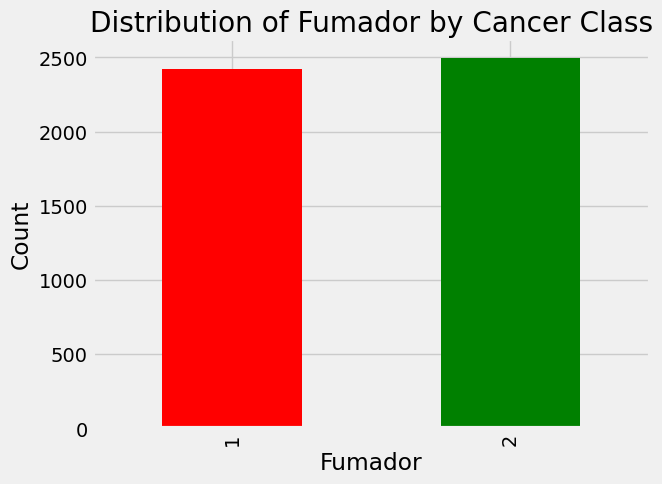

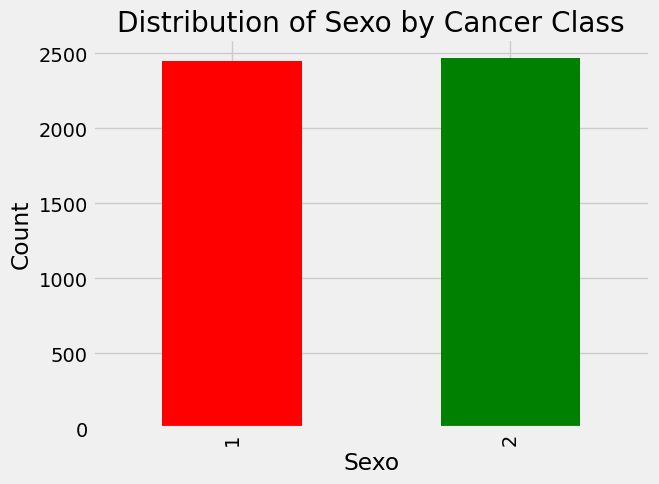

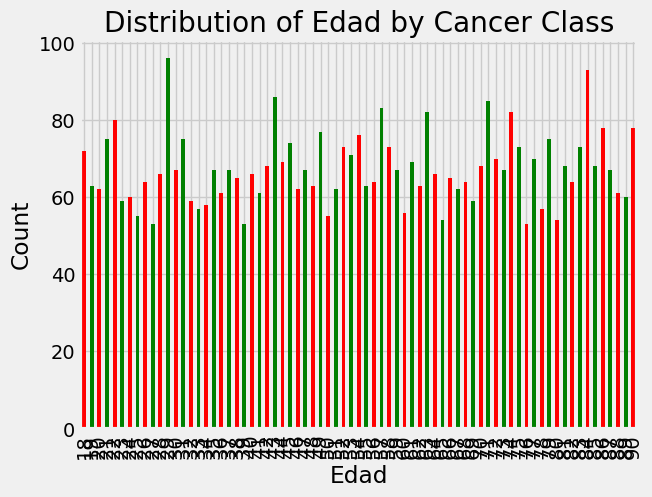

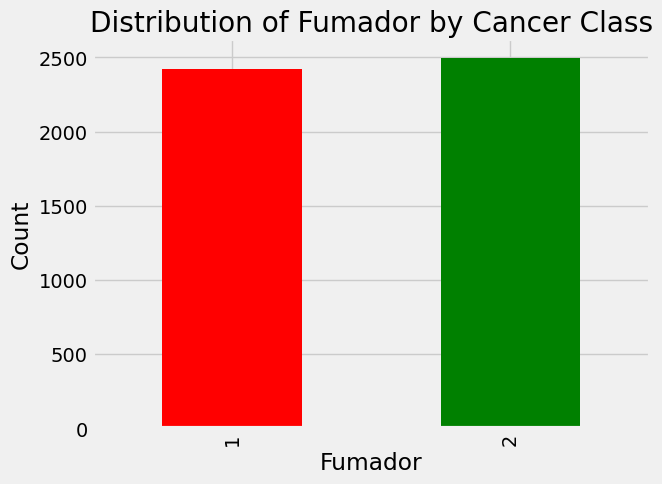

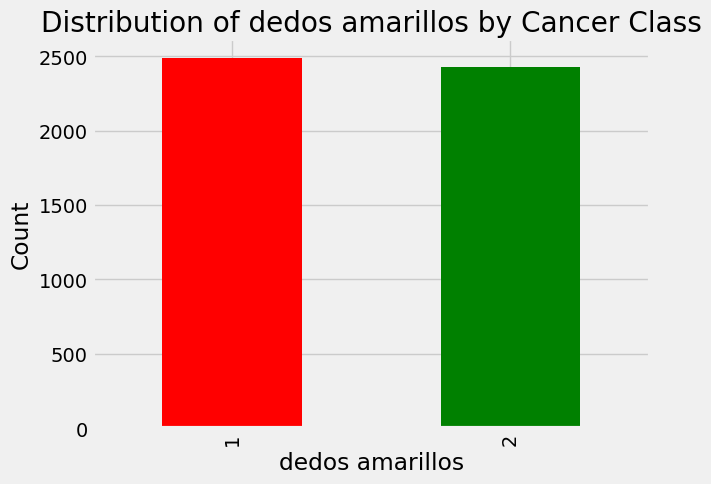

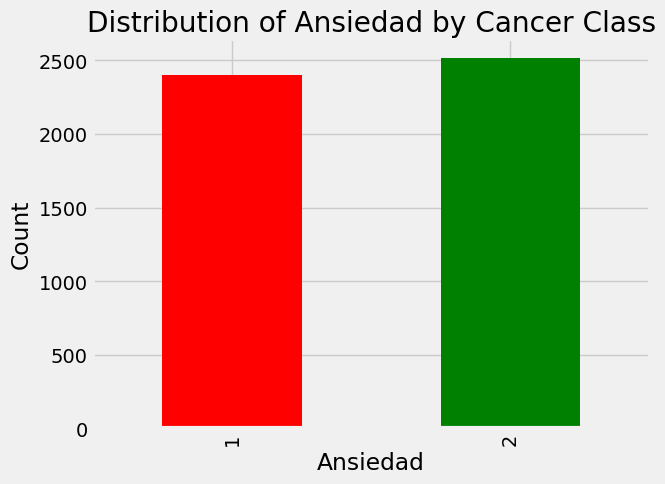

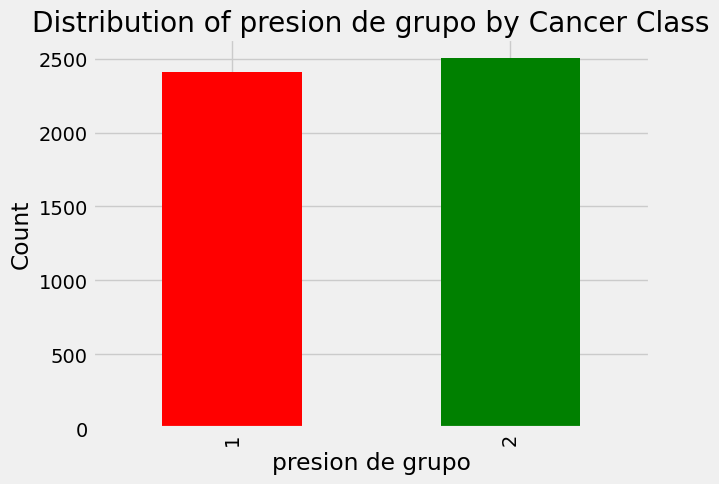

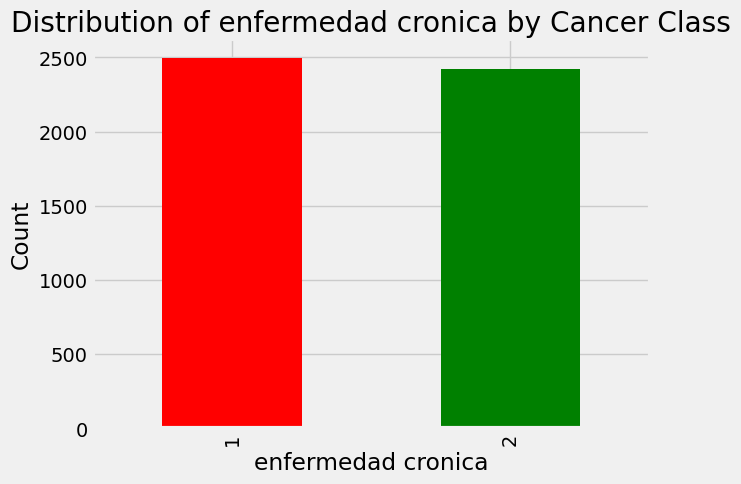

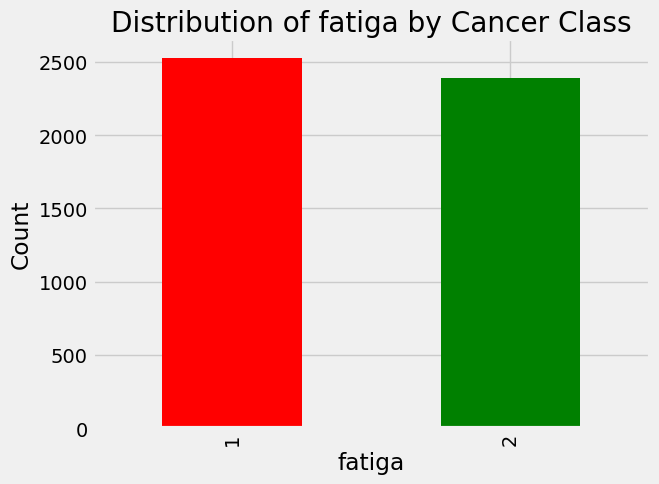

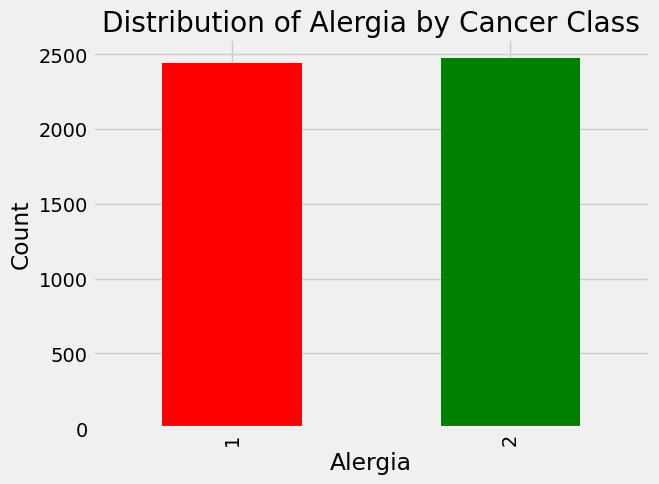

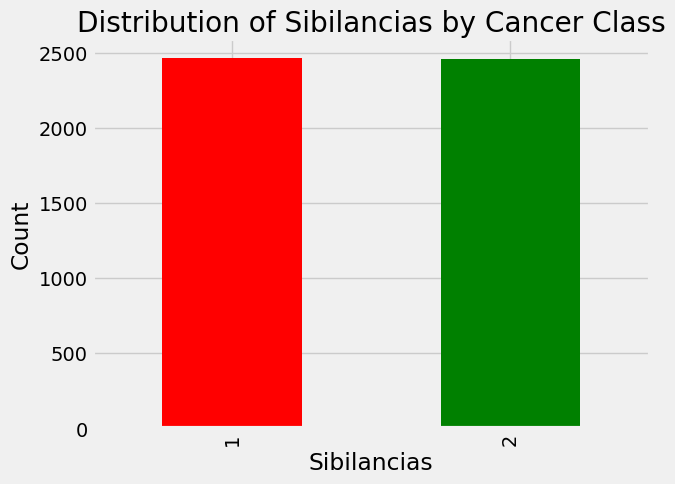

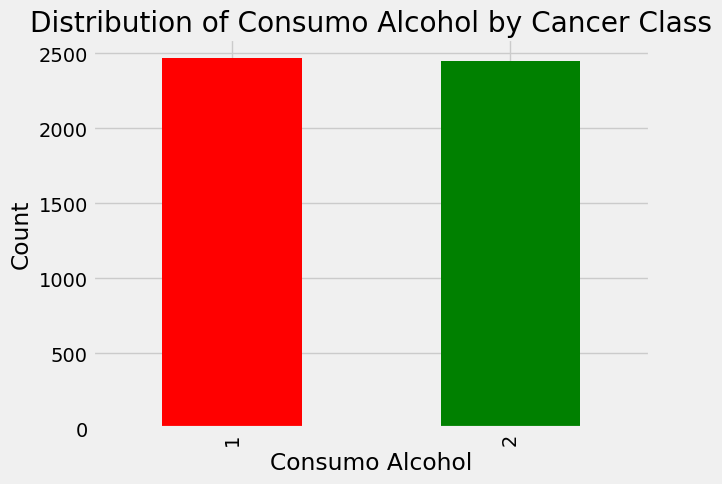

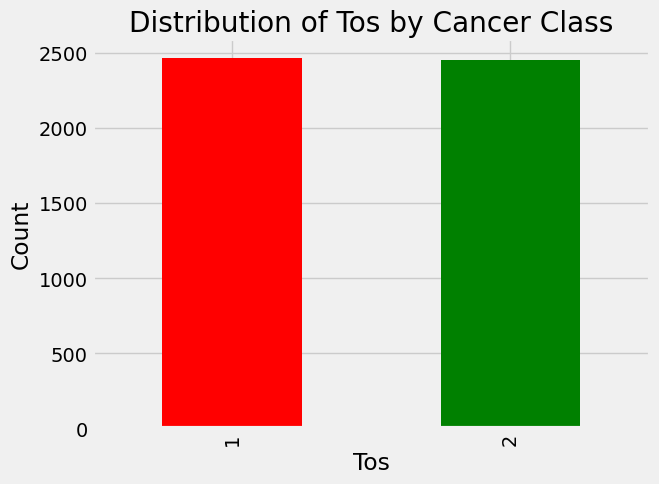

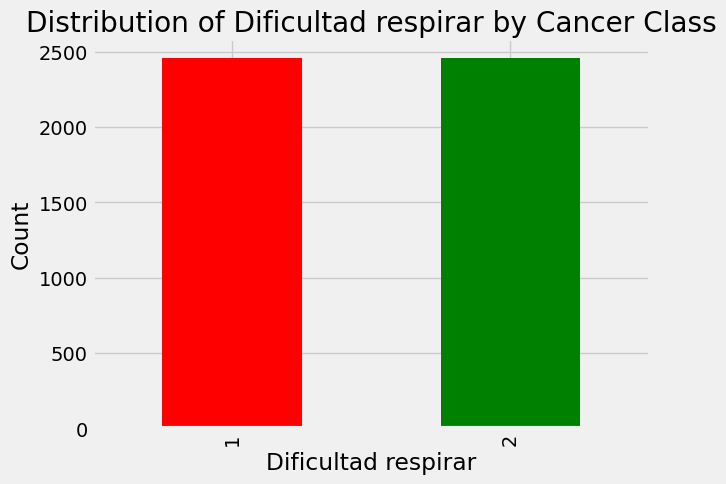

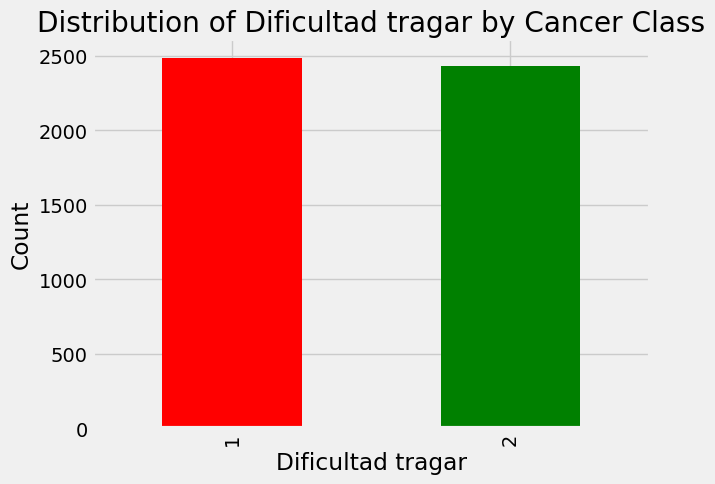

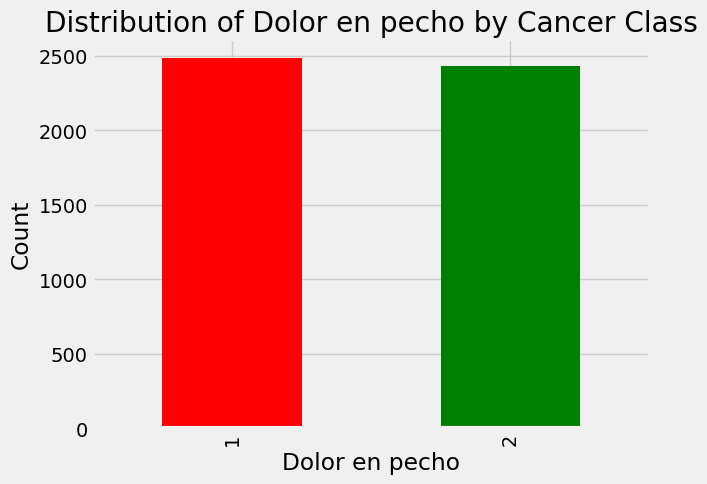

In [514]:
import pandas as pd

# Load your data (assuming CSV format)
data = pd.read_csv("datasets/respuestas_filtered.csv")

# Separate features (X) and target (y)
X = data.drop("Cancer de pulmon", axis=1)
y = data["Cancer de pulmon"]

# Function to visualize feature class distribution
def visualize_feature_distribution(feature_name):
  cancer_counts = data[y == 1][feature_name].value_counts().sort_values(ascending=False)
  no_cancer_counts = data[y == 0][feature_name].value_counts().sort_values(ascending=False)
  total_counts = cancer_counts.add(no_cancer_counts, fill_value=0)  # Handle missing values

  # Plot the distribution (you can use libraries like matplotlib.pyplot)
  total_counts.plot(kind="bar", color=["red", "green"])  # Red for cancer, green for no cancer
  plt.xlabel(feature_name)
  plt.ylabel("Count")
  plt.title(f"Distribution of {feature_name} by Cancer Class")
  plt.show()

# Example usage: Check imbalance in a specific feature
visualize_feature_distribution("Fumador")

# Loop through all features for exploration
for feature in X.columns:
  visualize_feature_distribution(feature)
